In [1]:
# Intialization
import os
import sys

os.environ["SPARK_HOME"] = "/home/talentum/spark"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
# In below two lines, use /usr/bin/python2.7 if you want to use Python 2
os.environ["PYSPARK_PYTHON"] = "/usr/bin/python3.6" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/bin/python3.6"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

# NOTE: Whichever package you want mention here.
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0 pyspark-shell' 
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-avro_2.11:2.4.0 pyspark-shell'
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0,org.apache.spark:spark-avro_2.11:2.4.3 pyspark-shell'
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0,org.apache.spark:spark-avro_2.11:2.4.0 pyspark-shell'

In [2]:
#Entrypoint 2.x
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("WeatherPredictionPune").enableHiveSupport().getOrCreate()

# On yarn:
# spark = SparkSession.builder.appName("Spark SQL basic example").enableHiveSupport().master("yarn").getOrCreate()
# specify .master("yarn")

sc = spark.sparkContext

In [3]:
# Read the CSV file into a Spark DataFrame
df_spark = spark.read.csv("file:///home/talentum/Pune_23.csv", header=True, inferSchema=True)

# Show the DataFrame
df_spark.show()

+-------------------+--------+--------+-------+-------+-----------------+--------+--------+--------+--------+---------+----------+----------+----------+------------+----------+--------+--------+--------+-----+----------+-------------+-------------+
|          date_time|maxtempC|mintempC|sunHour|uvIndex|moon_illumination|moonrise| moonset| sunrise|  sunset|DewPointC|FeelsLikeC|HeatIndexC|WindChillC|WindGustKmph|cloudcover|humidity|precipMM|pressure|tempC|visibility|winddirDegree|windspeedKmph|
+-------------------+--------+--------+-------+-------+-----------------+--------+--------+--------+--------+---------+----------+----------+----------+------------+----------+--------+--------+--------+-----+----------+-------------+-------------+
|2017-01-01 01:00:00|      31|      17|   11.0|      6|               20|09:15 AM|08:58 PM|07:07 AM|06:09 PM|    20714|        18|        18|        18|           5|         1|      63|     0.0|    1014|   18|        10|           82|            2|
|201

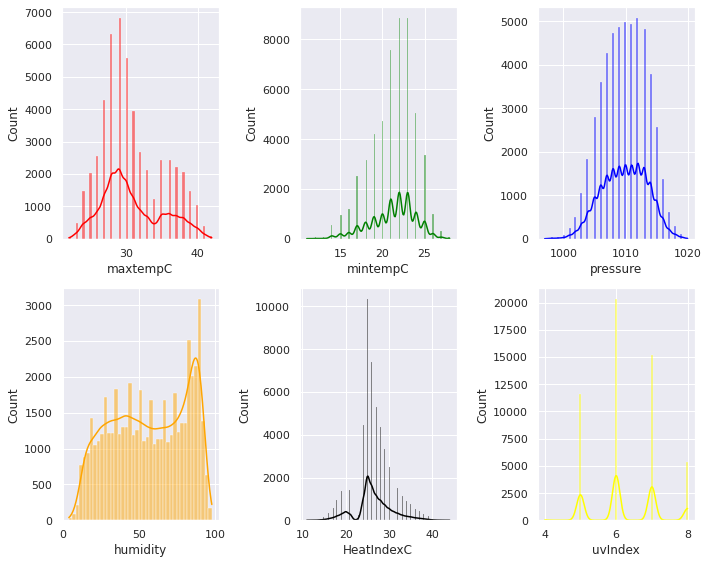

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame
df = df_spark.toPandas()

# Plotting
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

sns.histplot(data=df, x="maxtempC", kde=True, ax=axs[0, 0], color='red')
sns.histplot(data=df, x="mintempC", kde=True, ax=axs[0, 1], color='green')
sns.histplot(data=df, x="pressure", kde=True, ax=axs[0, 2], color='blue')
sns.histplot(data=df, x="humidity", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df, x="HeatIndexC", kde=True, ax=axs[1, 1], color='black')
sns.histplot(data=df, x="uvIndex", kde=True, ax=axs[1, 2], color='yellow')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('histogram_distribution.png')


In [5]:
# Get number of rows
num_rows = df_spark.count()

# Get number of columns
num_columns = len(df_spark.columns)

# Print the shape
print(f"Shape of the DataFrame: ({num_rows}, {num_columns})")

Shape of the DataFrame: (52583, 23)


In [6]:
df_spark.dtypes

[('date_time', 'timestamp'),
 ('maxtempC', 'int'),
 ('mintempC', 'int'),
 ('sunHour', 'double'),
 ('uvIndex', 'int'),
 ('moon_illumination', 'int'),
 ('moonrise', 'string'),
 ('moonset', 'string'),
 ('sunrise', 'string'),
 ('sunset', 'string'),
 ('DewPointC', 'int'),
 ('FeelsLikeC', 'int'),
 ('HeatIndexC', 'int'),
 ('WindChillC', 'int'),
 ('WindGustKmph', 'int'),
 ('cloudcover', 'int'),
 ('humidity', 'int'),
 ('precipMM', 'double'),
 ('pressure', 'int'),
 ('tempC', 'int'),
 ('visibility', 'int'),
 ('winddirDegree', 'int'),
 ('windspeedKmph', 'int')]

In [7]:
from pyspark.sql.functions import col, sum

# Print the schema

print("Schema:")
df_spark.printSchema()

# Print column names
print("\nColumns:")
print(df_spark.columns)

# Count number of rows
num_rows = df_spark.count()
print("\nNumber of rows:", num_rows)

# Show basic statistics
print("\nBasic statistics:")
df_spark.describe().show()

# Count nulls in each column
print("\nNull counts:")
null_counts = df_spark.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_spark.columns])
null_counts.show()

Schema:
root
 |-- date_time: timestamp (nullable = true)
 |-- maxtempC: integer (nullable = true)
 |-- mintempC: integer (nullable = true)
 |-- sunHour: double (nullable = true)
 |-- uvIndex: integer (nullable = true)
 |-- moon_illumination: integer (nullable = true)
 |-- moonrise: string (nullable = true)
 |-- moonset: string (nullable = true)
 |-- sunrise: string (nullable = true)
 |-- sunset: string (nullable = true)
 |-- DewPointC: integer (nullable = true)
 |-- FeelsLikeC: integer (nullable = true)
 |-- HeatIndexC: integer (nullable = true)
 |-- WindChillC: integer (nullable = true)
 |-- WindGustKmph: integer (nullable = true)
 |-- cloudcover: integer (nullable = true)
 |-- humidity: integer (nullable = true)
 |-- precipMM: double (nullable = true)
 |-- pressure: integer (nullable = true)
 |-- tempC: integer (nullable = true)
 |-- visibility: integer (nullable = true)
 |-- winddirDegree: integer (nullable = true)
 |-- windspeedKmph: integer (nullable = true)


Columns:
['date_time

In [8]:
df_spark.describe().show()

+-------+-----------------+------------------+------------------+------------------+-----------------+-----------+----------+--------+--------+------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+-------------------+------------------+------------------+------------------+-----------------+------------------+
|summary|         maxtempC|          mintempC|           sunHour|           uvIndex|moon_illumination|   moonrise|   moonset| sunrise|  sunset|         DewPointC|        FeelsLikeC|        HeatIndexC|       WindChillC|     WindGustKmph|        cloudcover|         humidity|           precipMM|          pressure|             tempC|        visibility|    winddirDegree|     windspeedKmph|
+-------+-----------------+------------------+------------------+------------------+-----------------+-----------+----------+--------+--------+------------------+------------------+------------------+-----------------+------

In [9]:
#Removing unwanted features from Dataset

In [10]:
columns_to_drop = ['date_time', 'moonrise', 'moonset', 'sunrise', 'sunset', 'FeelsLikeC']
df_spark = df_spark.drop(*columns_to_drop)

# Show the updated DataFrame schema
df_spark.printSchema()

root
 |-- maxtempC: integer (nullable = true)
 |-- mintempC: integer (nullable = true)
 |-- sunHour: double (nullable = true)
 |-- uvIndex: integer (nullable = true)
 |-- moon_illumination: integer (nullable = true)
 |-- DewPointC: integer (nullable = true)
 |-- HeatIndexC: integer (nullable = true)
 |-- WindChillC: integer (nullable = true)
 |-- WindGustKmph: integer (nullable = true)
 |-- cloudcover: integer (nullable = true)
 |-- humidity: integer (nullable = true)
 |-- precipMM: double (nullable = true)
 |-- pressure: integer (nullable = true)
 |-- tempC: integer (nullable = true)
 |-- visibility: integer (nullable = true)
 |-- winddirDegree: integer (nullable = true)
 |-- windspeedKmph: integer (nullable = true)



In [11]:
#Displaying count of null values in each columns

In [12]:
from pyspark.sql import functions as F
# Create a list of column names with corresponding null counts
null_counts = df_spark.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df_spark.columns])

# Show the null counts
null_counts.show()


+--------+--------+-------+-------+-----------------+---------+----------+----------+------------+----------+--------+--------+--------+-----+----------+-------------+-------------+
|maxtempC|mintempC|sunHour|uvIndex|moon_illumination|DewPointC|HeatIndexC|WindChillC|WindGustKmph|cloudcover|humidity|precipMM|pressure|tempC|visibility|winddirDegree|windspeedKmph|
+--------+--------+-------+-------+-----------------+---------+----------+----------+------------+----------+--------+--------+--------+-----+----------+-------------+-------------+
|     870|      25|    152|     53|                1|        3|         0|        25|           9|         0|       0|      16|       2|    0|         0|            0|            0|
+--------+--------+-------+-------+-----------------+---------+----------+----------+------------+----------+--------+--------+--------+-----+----------+-------------+-------------+



In [13]:
#Removing null values by imputing null values by mean 

In [14]:
from pyspark.sql.functions import mean, col, sum

# Identify numerical columns
numerical_columns = [c for c, dtype in df_spark.dtypes if dtype in ('int', 'double')]

# Calculate mean for each numerical column
mean_values = df_spark.select([mean(col(c)).alias(c) for c in numerical_columns]).first().asDict()

# Fill missing values with the calculated means
filled_df = df_spark.fillna(mean_values)

# Count nulls in each column after filling
null_counts = filled_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in filled_df.columns])

# Show the null counts to verify
null_counts.show()


+--------+--------+-------+-------+-----------------+---------+----------+----------+------------+----------+--------+--------+--------+-----+----------+-------------+-------------+
|maxtempC|mintempC|sunHour|uvIndex|moon_illumination|DewPointC|HeatIndexC|WindChillC|WindGustKmph|cloudcover|humidity|precipMM|pressure|tempC|visibility|winddirDegree|windspeedKmph|
+--------+--------+-------+-------+-----------------+---------+----------+----------+------------+----------+--------+--------+--------+-----+----------+-------------+-------------+
|       0|       0|      0|      0|                0|        0|         0|         0|           0|         0|       0|       0|       0|    0|         0|            0|            0|
+--------+--------+-------+-------+-----------------+---------+----------+----------+------------+----------+--------+--------+--------+-----+----------+-------------+-------------+



In [15]:
#Separating Features and target columns

In [16]:
# Drop the 'tempC' column to create X
X = filled_df.drop('tempC')

# Select the 'tempC' column to create Y
Y = filled_df.select('tempC')

# Show X and Y to verify
X.show()
Y.show()

+--------+--------+------------------+-------+-----------------+---------+----------+----------+------------+----------+--------+--------+--------+----------+-------------+-------------+
|maxtempC|mintempC|           sunHour|uvIndex|moon_illumination|DewPointC|HeatIndexC|WindChillC|WindGustKmph|cloudcover|humidity|precipMM|pressure|visibility|winddirDegree|windspeedKmph|
+--------+--------+------------------+-------+-----------------+---------+----------+----------+------------+----------+--------+--------+--------+----------+-------------+-------------+
|      31|      17|              11.0|      6|               20|    20714|        18|        18|           5|         1|      63|     0.0|    1014|        10|           82|            2|
|      31|      17|              11.0|      6|               20|    20715|        18|        18|           5|         0|      63|     0.0|    1014|        10|           94|            3|
|      31|      17|              11.0|      6|               20| 

In [17]:
#Splitting data into train and test data using Random sampling
#Saving data into HDFS 

In [18]:
train_df, test_df = filled_df.randomSplit([0.8, 0.2], seed=69)

# HDFS namenode address and port
namenode = "hdfs://localhost"
port = "9000"

# Full HDFS path
hdfs_path = f"{namenode}:{port}/user/talentum/"

# Save the training and testing sets to HDFS
train_df.write.mode('overwrite').parquet(f'{hdfs_path}/train_df')
test_df.write.mode('overwrite').parquet(f'{hdfs_path}/test_df')


In [19]:
#Linear Regression model Without HyperParameters

In [20]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Load the training and testing sets from HDFS
train_df = spark.read.parquet(f'{hdfs_path}/train_df')
test_df = spark.read.parquet(f'{hdfs_path}/test_df')

# Prepare the feature assembler
assembler = VectorAssembler(inputCols=[col for col in train_df.columns if col != 'tempC'], outputCol="features")

# Transform training and test data
train_data = assembler.transform(train_df).select("features", col("tempC").alias("label"))
test_data = assembler.transform(test_df).select("features", col("tempC").alias("label"))

# Initialize the Linear Regression model with default parameters
lr = LinearRegression(featuresCol="features", labelCol="label")

# Fit the model on the training data
model = lr.fit(train_data)

# Evaluate the model on test data
test_predictions = model.transform(test_data)

# Initialize evaluators for different metrics
evaluator_rmse = RegressionEvaluator(metricName="rmse", labelCol="label", predictionCol="prediction")
evaluator_mae = RegressionEvaluator(metricName="mae", labelCol="label", predictionCol="prediction")
evaluator_r2 = RegressionEvaluator(metricName="r2", labelCol="label", predictionCol="prediction")

# Calculate metrics
rmse = evaluator_rmse.evaluate(test_predictions)
mae = evaluator_mae.evaluate(test_predictions)
r2 = evaluator_r2.evaluate(test_predictions)

print(f"Model's RMSE on test data: {rmse}")
print(f"Model's MAE on test data: {mae}")
print(f"Model's R² on test data: {r2}")

# Define the HDFS model path
model_path = f"{namenode}:{port}/user/talentum/lrg_model"

# Save the model to HDFS with overwrite option
try:
    model.write().overwrite().save(model_path)
    print(f"Model saved to: {model_path}")
except Exception as e:
    print(f"Error saving the model: {e}")


Model's RMSE on test data: 2.0294049155959217
Model's MAE on test data: 0.9655608707598868
Model's R² on test data: 0.8052925612905231
Model saved to: hdfs://localhost:9000/user/talentum/lrg_model


In [21]:
#Linear Model after using HyperParameter

In [22]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

# Load the training and testing sets from HDFS
train_df = spark.read.parquet(f'{hdfs_path}/train_df')
test_df = spark.read.parquet(f'{hdfs_path}/test_df')

# Prepare the feature assembler
assembler = VectorAssembler(inputCols=[col for col in train_df.columns if col != 'tempC'], outputCol="features")

# Transform training and test data
train_data = assembler.transform(train_df).select("features", col("tempC").alias("label"))
test_data = assembler.transform(test_df).select("features", col("tempC").alias("label"))

# Initialize the Linear Regression model with maxIter set to 50
lr = LinearRegression(featuresCol="features", labelCol="label", maxIter=50)

# Set up the parameter grid for tuning
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.1, 0.5])         # Regularization parameter
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])   # ElasticNet mixing parameter
             .build())

# Define the evaluator
evaluator = RegressionEvaluator(metricName="rmse", labelCol="label", predictionCol="prediction")

# Set up cross-validator with parallelism
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3,      # 3-fold cross-validation
                          parallelism=4)   # Use 4 parallel tasks

# Fit the cross-validator model
cv_model = crossval.fit(train_data)

# Select the best model
best_model = cv_model.bestModel

# Evaluate the model on test data
test_predictions = best_model.transform(test_data)

# Print the hyperparameters of the best model
print("\nBest Model Hyperparameters:")
print(f" - regParam: {best_model._java_obj.getRegParam()}")
print(f" - elasticNetParam: {best_model._java_obj.getElasticNetParam()}")

# Define the HDFS model path
model_path = f"{namenode}:{port}/user/talentum/lrg_best_model"

# Save the best model to HDFS with overwrite option
try:
    best_model.write().overwrite().save(model_path)
    print(f"Best model saved to: {model_path}")
except Exception as e:
    print(f"Error saving the model: {e}")



Best Model Hyperparameters:
 - regParam: 0.01
 - elasticNetParam: 1.0
Best model saved to: hdfs://localhost:9000/user/talentum/lrg_best_model


In [23]:
from pyspark.ml.evaluation import RegressionEvaluator

# Make predictions on test data
predictions = best_model.transform(test_data)

# Initialize the RegressionEvaluator
evaluator = RegressionEvaluator(
    labelCol="label", 
    predictionCol="prediction", 
    metricName="mae"  # Mean Absolute Error
)

# Calculate Mean Absolute Error (MAE)
mae = evaluator.evaluate(predictions)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 0.9636851135415566


In [24]:
from pyspark.ml.evaluation import RegressionEvaluator
import math

# Make predictions on test data
predictions = best_model.transform(test_data)

# Initialize the RegressionEvaluator for RMSE
evaluator_rmse = RegressionEvaluator(
    labelCol="label", 
    predictionCol="prediction", 
    metricName="rmse"  # Root Mean Squared Error
)

# Calculate Root Mean Squared Error (RMSE)
rmse = evaluator_rmse.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 2.030390525528172


In [25]:
from pyspark.ml.evaluation import RegressionEvaluator

# Make predictions on test data
predictions = best_model.transform(test_data)

# Initialize the RegressionEvaluator
evaluator = RegressionEvaluator(
    labelCol="label", 
    predictionCol="prediction", 
    metricName="r2"  # R-squared score
)

# Calculate R-squared (R²) score
r2 = evaluator.evaluate(predictions)
print(f"R-squared (R²) score: {r2}")


R-squared (R²) score: 0.8051033903814893


In [26]:
# Make predictions on test data
predictions = best_model.transform(test_data)

# Extract predictions as a DataFrame
predicted_values_df = predictions.select("prediction")

# Collect predictions into a list
y_pred = predicted_values_df.rdd.flatMap(lambda x: x).collect()

# If you also need true values
true_values_df = predictions.select("label")
y_true = true_values_df.rdd.flatMap(lambda x: x).collect()

# Display some results
print(f"First few true values: {y_true[:5]}")
print(f"First few predicted values: {y_pred[:5]}")


First few true values: [22, 22, 22, 21, 20]
First few predicted values: [21.93971224560696, 21.98499350788085, 22.412208033843605, 21.5116099005854, 19.607891395629892]


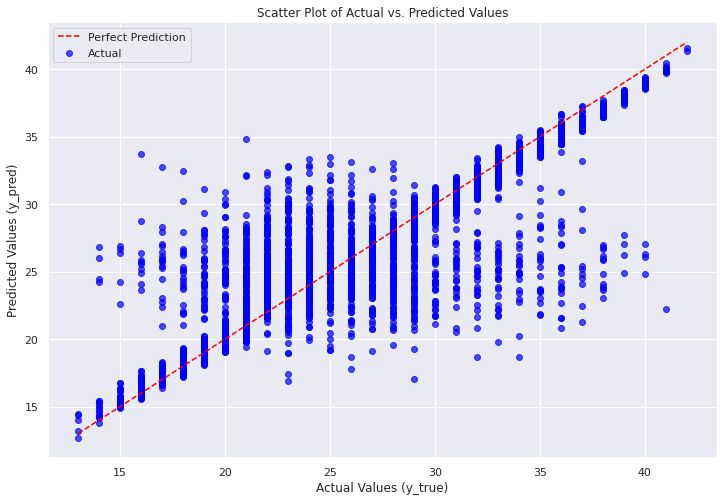

In [27]:
import matplotlib.pyplot as plt

# Example data (replace these with your actual data)
# y_true = [actual values]
# y_pred = [predicted values]

# Create a figure with a specific size
plt.figure(figsize=(12, 8))  # Width = 12 inches, Height = 8 inches

# Create a scatter plot
plt.scatter(y_true, y_pred, c='blue', label='Actual', alpha=0.7)

# Plot the line of perfect prediction
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle='--', color='red', label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Values (y_true)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot of Actual vs. Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()

#This plot helps evaluate the performance of your regression 
#model by showing how well the predicted values correspond to the actual values.


In [28]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegressionModel



# Define the HDFS path where the model is saved
model_path = "hdfs://localhost:9000/user/talentum/lrg_best_model"  # Replace with your HDFS path

# Define the artificial input data with all 16 features
input_data = np.array([[31, 17, 11, 6, 20, 20714, 18, 18, 18, 5, 1, 63, 0, 1014, 10, 82]])

# Convert input_data to a Spark DataFrame
feature_columns = [f"feature{i+1}" for i in range(input_data.shape[1])]
input_df = spark.createDataFrame(pd.DataFrame(input_data, columns=feature_columns))

# Load the trained model from HDFS
model = LinearRegressionModel.load(model_path)

# Prepare the feature assembler
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
input_data_transformed = assembler.transform(input_df)

# Make predictions
predictions = model.transform(input_data_transformed)

# Show predictions (for demonstration purposes)
predictions.show()



+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+---------+---------+---------+---------+---------+---------+--------------------+-----------------+
|feature1|feature2|feature3|feature4|feature5|feature6|feature7|feature8|feature9|feature10|feature11|feature12|feature13|feature14|feature15|feature16|            features|       prediction|
+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+---------+---------+---------+---------+---------+---------+--------------------+-----------------+
|      31|      17|      11|       6|      20|   20714|      18|      18|      18|        5|        1|       63|        0|     1014|       10|       82|[31.0,17.0,11.0,6...|48.01519215413649|
+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+---------+---------+---------+---------+---------+---------+--------------------+-----------------+



In [29]:
#Decision Tree without using Hyperparameters

In [30]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize SparkSession
spark = SparkSession.builder.appName("DecisionTreeRegressorExample").getOrCreate()

# Define the HDFS path
hdfs_path = "hdfs://localhost:9000/user/talentum/"  # Replace with your actual HDFS path

# Load the training and testing sets from HDFS
train_df = spark.read.parquet(f'{hdfs_path}/train_df')
test_df = spark.read.parquet(f'{hdfs_path}/test_df')

# Prepare the feature assembler
assembler = VectorAssembler(inputCols=[col for col in train_df.columns if col != 'tempC'], outputCol="features")

# Transform the data to include the feature column
train_data_assembled = assembler.transform(train_df)
test_data_assembled = assembler.transform(test_df)

# Scale the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withMean=True, withStd=True)
scaler_model = scaler.fit(train_data_assembled)
train_data_scaled = scaler_model.transform(train_data_assembled)
test_data_scaled = scaler_model.transform(test_data_assembled)

# Prepare final training and test datasets
train_data_final = train_data_scaled.select(col("scaled_features").alias("features"), col("tempC").alias("label"))
test_data_final = test_data_scaled.select(col("scaled_features").alias("features"), col("tempC").alias("label"))

# Initialize the Decision Tree Regressor model
dt = DecisionTreeRegressor(featuresCol="features", labelCol="label")

# Fit the Decision Tree model
model = dt.fit(train_data_final)

# Evaluate the model on test data
predictions = model.transform(test_data_final)

# Define the evaluator
evaluator_rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator_rmse.evaluate(predictions)
print(f"Model's RMSE on test data: {rmse}")

# Evaluate the model using MAE
evaluator_mae = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mae")
mae = evaluator_mae.evaluate(predictions)
print(f"Mean Absolute Error (MAE) on test data = {mae}")

# Evaluate the model using R2
evaluator_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print(f"R² Score on test data = {r2}")

# Show some prediction results
#predictions.select("prediction", "label", "features").show(5)

# Define model paths
model_path_hdfs = f'{hdfs_path}dt_model'
scaler_model_path_hdfs = f'{hdfs_path}scaler_model'

# Save the model to HDFS
model.write().overwrite().save(model_path_hdfs)
print(f"Decision Tree model saved to: {model_path_hdfs}")


Model's RMSE on test data: 1.9108793745767327
Mean Absolute Error (MAE) on test data = 0.8996887325834618
R² Score on test data = 0.8273718272776558
Decision Tree model saved to: hdfs://localhost:9000/user/talentum/dt_model


In [31]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Define the HDFS path
hdfs_path = "hdfs://localhost:9000/user/talentum/"

# Load the training and testing sets from HDFS
train_df = spark.read.parquet(f'{hdfs_path}/train_df')
test_df = spark.read.parquet(f'{hdfs_path}/test_df')

# Prepare the feature assembler
assembler = VectorAssembler(inputCols=[col for col in train_df.columns if col != 'tempC'], outputCol="features")

# Transform the data to include the feature column
train_data_assembled = assembler.transform(train_df)
test_data_assembled = assembler.transform(test_df)

# Scale the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withMean=True, withStd=True)
scaler_model = scaler.fit(train_data_assembled)
train_data_scaled = scaler_model.transform(train_data_assembled)
test_data_scaled = scaler_model.transform(test_data_assembled)

# Prepare final training and test datasets
train_data_final = train_data_scaled.select(col("scaled_features").alias("features"), col("tempC").alias("label"))
test_data_final = test_data_scaled.select(col("scaled_features").alias("features"), col("tempC").alias("label"))

# Initialize the Decision Tree Regressor model
dt = DecisionTreeRegressor(featuresCol="features", labelCol="label")

# Set up the parameter grid for tuning only maxDepth and minInfoGain
paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [5, 10, 15])
             .addGrid(dt.minInfoGain, [0.0, 0.01])
             .build())

# Define the evaluator
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")

# Set up cross-validator
crossval = CrossValidator(estimator=dt,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3,
                          parallelism=4)

# Fit the cross-validator model
cv_model = crossval.fit(train_data_final)

# Select the best model
best_model = cv_model.bestModel

# Evaluate the best model on test data
predictions = best_model.transform(test_data_final)
rmse = evaluator.evaluate(predictions)
print(f"Best Model's RMSE on test data: {rmse}")

# Evaluate the model using MAE
evaluator_mae = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mae")
mae = evaluator_mae.evaluate(predictions)
print(f"Mean Absolute Error (MAE) on test data = {mae}")

# Retrieve the parameter grid and best model parameters
param_maps = crossval.getEstimatorParamMaps()
metrics = cv_model.avgMetrics

# Find the index of the best model
best_index = metrics.index(min(metrics))
best_param_map = param_maps[best_index]

# Print the best parameters
print("Best Model Hyperparameters:")
for param in best_param_map:
    print(f"{param.name}: {best_param_map[param]}")

# Define model paths
model_path_hdfs = f'{hdfs_path}dt_model'
scaler_model_path_hdfs = f'{hdfs_path}scaler_model'

# Save the best Decision Tree model to HDFS
best_model.write().overwrite().save(model_path_hdfs)
print(f"Decision Tree model saved to: {model_path_hdfs}")

# Save the scaler model to HDFS
scaler_model.write().overwrite().save(scaler_model_path_hdfs)
print(f"Scaler model saved to: {scaler_model_path_hdfs}")


Best Model's RMSE on test data: 1.9108793745767327
Mean Absolute Error (MAE) on test data = 0.8996887325834618
Best Model Hyperparameters:
maxDepth: 5
minInfoGain: 0.0
Decision Tree model saved to: hdfs://localhost:9000/user/talentum/dt_model
Scaler model saved to: hdfs://localhost:9000/user/talentum/scaler_model


In [32]:
from pyspark.ml.evaluation import RegressionEvaluator

# Evaluate the model using MAE
evaluator_mae = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mae")
mae = evaluator_mae.evaluate(predictions)
print(f"Mean Absolute Error (MAE) on test data = {mae}")


Mean Absolute Error (MAE) on test data = 0.8996887325834618


In [33]:
# Evaluate the model using R²
evaluator_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print(f"R² score on test data = {r2}")

R² score on test data = 0.8273718272776558


In [34]:
from pyspark.ml.feature import VectorAssembler, StandardScalerModel
from pyspark.ml.regression import DecisionTreeRegressionModel
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession, Row

# Define the HDFS path
hdfs_model_path = "hdfs://localhost:9000/user/talentum/dt_model"
hdfs_scaler_path = "hdfs://localhost:9000/user/talentum/scaler_model"

# Load the trained model from HDFS
dt_model = DecisionTreeRegressionModel.load(hdfs_model_path)

# Load the scaler model from HDFS
scaler_model = StandardScalerModel.load(hdfs_scaler_path)

# Prepare the input data
input_data = np.array([[31, 17, 11, 6, 20, 20714, 18, 18, 18, 5, 1, 63, 0, 1014, 10, 82]])
input_df = spark.createDataFrame([Row(features=Vectors.dense(input_data[0]))])

# Scale the input data
input_data_scaled = scaler_model.transform(input_df)

# Make predictions
predictions = dt_model.transform(input_data_scaled)
predictions.select("prediction").show()




+-----------------+
|       prediction|
+-----------------+
|37.24057971014493|
+-----------------+



In [35]:
#Random Forest without using HyperParameters

In [36]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Define the HDFS path
hdfs_path = "hdfs://localhost:9000/user/talentum/"  

# Load the training and testing sets from HDFS
train_df = spark.read.parquet(f'{hdfs_path}/train_df')
test_df = spark.read.parquet(f'{hdfs_path}/test_df')

# Prepare the feature assembler
assembler = VectorAssembler(inputCols=[col for col in train_df.columns if col != 'tempC'], outputCol="features")

# Transform the data to include the feature column
train_data_assembled = assembler.transform(train_df)
test_data_assembled = assembler.transform(test_df)

# Scale the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withMean=True, withStd=True)
scaler_model = scaler.fit(train_data_assembled)
train_data_scaled = scaler_model.transform(train_data_assembled)
test_data_scaled = scaler_model.transform(test_data_assembled)

# Prepare final training and test datasets
train_data_final = train_data_scaled.select(col("scaled_features").alias("features"), col("tempC").alias("label"))
test_data_final = test_data_scaled.select(col("scaled_features").alias("features"), col("tempC").alias("label"))

# Initialize the Random Forest Regressor model with default parameters
rf = RandomForestRegressor(featuresCol="features", labelCol="label")

# Fit the model
rf_model = rf.fit(train_data_final)

# Make predictions
predictions = rf_model.transform(test_data_final)

# Evaluate the model
evaluator_rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator_rmse.evaluate(predictions)
print(f"Model's RMSE on test data: {rmse}")

# Evaluate the model using MAE
evaluator_mae = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mae")
mae = evaluator_mae.evaluate(predictions)
print(f"Mean Absolute Error (MAE) on test data = {mae}")

# Evaluate the model using R-squared (R2)
evaluator_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print(f"R-squared (R2) on test data = {r2}")

# Show some prediction results
#predictions.select("prediction", "label", "features").show(5)


Model's RMSE on test data: 1.8666845131832503
Mean Absolute Error (MAE) on test data = 0.8473225060840271
R-squared (R2) on test data = 0.835264584096758


In [ ]:
#Random Forest using HyperParameters

In [37]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql import SparkSession
from pyspark.sql.functions import col


# Define the HDFS path
hdfs_path = "hdfs://localhost:9000/user/talentum/"  

# Load the training and testing sets from HDFS
train_df = spark.read.parquet(f'{hdfs_path}/train_df')
test_df = spark.read.parquet(f'{hdfs_path}/test_df')

# Prepare the feature assembler
assembler = VectorAssembler(inputCols=[col for col in train_df.columns if col != 'tempC'], outputCol="features")

# Transform the data to include the feature column
train_data_assembled = assembler.transform(train_df)
test_data_assembled = assembler.transform(test_df)

# Scale the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withMean=True, withStd=True)
scaler_model = scaler.fit(train_data_assembled)
train_data_scaled = scaler_model.transform(train_data_assembled)
test_data_scaled = scaler_model.transform(test_data_assembled)

# Prepare final training and test datasets
train_data_final = train_data_scaled.select(col("scaled_features").alias("features"), col("tempC").alias("label"))
test_data_final = test_data_scaled.select(col("scaled_features").alias("features"), col("tempC").alias("label"))

# Initialize the Random Forest Regressor model
rf = RandomForestRegressor(featuresCol="features", labelCol="label")

# Set up a reduced parameter grid
paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10, 20])  # Fewer trees to reduce computation
             .addGrid(rf.maxDepth, [5, 10])   # Fewer depths to reduce computation
             .addGrid(rf.minInfoGain, [0.0, 0.01])  # Minimal thresholds
             .build())

# Define the evaluator
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")

# Set up cross-validator
crossval = CrossValidator(estimator=rf,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3,      # 3-fold cross-validation
                          parallelism=4)   # Use 4 parallel tasks

# Fit the cross-validator model
cv_model = crossval.fit(train_data_final)

# Select the best model
best_model = cv_model.bestModel

# Print the best model hyperparameters
print("Best Model Hyperparameters:")
print(f"numTrees: {best_model._java_obj.getNumTrees()}")
print(f"maxDepth: {best_model._java_obj.getMaxDepth()}")
print(f"minInfoGain: {best_model._java_obj.getMinInfoGain()}")

# Save the best Random Forest model to HDFS
model_path_hdfs = f'{hdfs_path}rf_model'
scaler_model_path_hdfs = f'{hdfs_path}scaler_model'
best_model.write().overwrite().save(model_path_hdfs)
print(f"Random Forest model saved to: {model_path_hdfs}")

# Make predictions
predictions = best_model.transform(test_data_final)

# Evaluate the best model
evaluator_rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator_rmse.evaluate(predictions)
print(f"Best Model's RMSE on test data: {rmse}")

# Evaluate the model using MAE
evaluator_mae = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mae")
mae = evaluator_mae.evaluate(predictions)
print(f"Mean Absolute Error (MAE) on test data = {mae}")

# Evaluate the model using R-squared (R2)
evaluator_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print(f"R-squared (R2) on test data = {r2}")

# Show some prediction results
predictions.select("prediction", "label", "features").show(5)


Best Model Hyperparameters:
numTrees: 20
maxDepth: 10
minInfoGain: 0.0
Random Forest model saved to: hdfs://localhost:9000/user/talentum/rf_model
Best Model's RMSE on test data: 1.7595185671947366
Mean Absolute Error (MAE) on test data = 0.6180021647559436
R-squared (R2) on test data = 0.853636483230075
+------------------+-----+--------------------+
|        prediction|label|            features|
+------------------+-----+--------------------+
| 21.91351761891793|   22|[-2.0941362291209...|
| 21.91351761891793|   22|[-2.0941362291209...|
|22.157321044552532|   22|[-2.0941362291209...|
| 21.86217952471511|   21|[-2.0941362291209...|
|20.148950387400333|   20|[-2.0941362291209...|
+------------------+-----+--------------------+
only showing top 5 rows



In [38]:
#XGBoost Model without HyperParameters

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv("file:///home/talentum/Pune_23.csv")

# Drop unsupported columns
data = data.drop(columns=['date_time', 'moonrise', 'moonset', 'sunrise', 'sunset', 'FeelsLikeC'])

# Prepare the data
X = data.drop(columns=['tempC'])  # Features
y = data['tempC']                 # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the XGBoost Regressor with default parameters
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")
print(f"Mean Absolute Error (MAE) on test data: {mae}")
print(f"R-squared (R2) on test data: {r2}")

# Show some prediction results
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(results.head())


/home/talentum/.local/lib/python3.6/site-packages/pkg_resources/__init__.py:119: PkgResourcesDeprecationWarning: 0.18ubuntu0.18.04.1 is an invalid version and will not be supported in a future release
  PkgResourcesDeprecationWarning,


Root Mean Squared Error (RMSE) on test data: 1.826048052898857
Mean Absolute Error (MAE) on test data: 0.6288576527807982
R-squared (R2) on test data: 0.8420752606373079


In [40]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Initialize the XGBoost Regressor
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Define a smaller parameter grid
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'gamma': [0, 0.1]
}

# Set up GridSearchCV with a smaller grid
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,              # 3-fold cross-validation
    verbose=1,         # Print progress
    n_jobs=-1          # Use all available CPU cores
)

# Train the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Model Hyperparameters:")
print(grid_search.best_params_)

# Make predictions on the test data
y_pred = best_xgb.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")
print(f"Mean Absolute Error (MAE) on test data: {mae}")
print(f"R-squared (R2) on test data: {r2}")

# Show some prediction results
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(results.head())


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Model Hyperparameters:
{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5}
Root Mean Squared Error (RMSE) on test data: 1.7350951788466618
Mean Absolute Error (MAE) on test data: 0.5931810299411885
R-squared (R2) on test data: 0.857415482249666
